# PB-POMIS: Hyperparameter Tuning

In [44]:
import baselines.common.notebook_utils as nu
import pandas as pd
import matplotlib.pyplot as plt
import glob
from importlib import reload
reload(nu)

<module 'baselines.common.notebook_utils' from '/home/matteo/baselines/baselines/common/notebook_utils.py'>

In [2]:
plt.close('all')

In [3]:
seeds = [10, 109, 904, 160, 570]

In [4]:
path = '../results/pbpomis_grid/pbpomis_grid'

## Setting:
* Batchsize = 10
* No bias
* No centering

## Cartpole

### Single IS (capacity = 1), self-normalized

delta=0.0100: 4286.154313 ± 26.986483	[4252.646168, 4319.662458]	 total horizon: 214396
delta=0.0200: 4498.384409 ± 75.119889	[4405.110748, 4591.658071]	 total horizon: 224983
delta=0.0500: 4668.269969 ± 91.932939	[4554.120148, 4782.419790]	 total horizon: 233461
delta=0.1000: 4783.427942 ± 68.553306	[4698.307770, 4868.548114]	 total horizon: 239215
delta=0.2000: 2817.027048 ± 1100.111933	[2030.054379, 3603.999716]	 total horizon: 141286
delta=0.3000: 3290.421736 ± 1653.002299	[1237.948292, 5342.895180]	 total horizon: 164837
delta=0.4000: 2155.553292 ± 1519.190412	[1068.789940, 3242.316645]	 total horizon: 108195
delta=0.6000: 2674.285447 ± 1679.712500	[588.646908, 4759.923985]	 total horizon: 134111


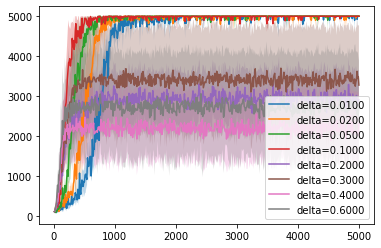

In [45]:
deltas = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=rows*batchsize=10_*cap=1_*delta=%.4f*' % delta) for delta in deltas}
candidates_IS = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}
f = nu.compare(candidates_IS, bootstrap=True)

### MULTIPLE IS (capacity = 10), row-normalized

delta=0.0100: 4133.462264 ± 173.807501	[3917.651747, 4349.272781]	 total horizon: 206795
delta=0.0200: 4374.968301 ± 88.267561	[4265.369648, 4484.566954]	 total horizon: 218838
delta=0.0500: 4652.836762 ± 124.225815	[4498.590041, 4807.083484]	 total horizon: 232693
delta=0.1000: 3841.913088 ± 1248.539757	[2291.646222, 5392.179954]	 total horizon: 192341
delta=0.2000: 4582.480595 ± 369.589338	[4318.092310, 4846.868881]	 total horizon: 229247
delta=0.3000: 3988.192222 ± 1762.023284	[1800.351346, 6176.033098]	 total horizon: 199545
delta=0.4000: 3044.871606 ± 1601.041527	[1899.555493, 4190.187719]	 total horizon: 152564
delta=0.6000: 3691.975173 ± 1516.980198	[1808.395476, 5575.554871]	 total horizon: 184832


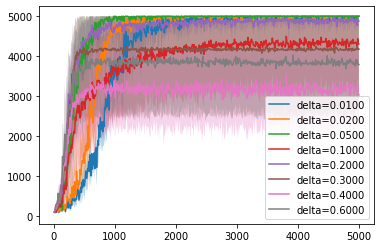

In [46]:
deltas = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=rows*batchsize=10_*cap=10_*delta=%.4f*' % delta) for delta in deltas}
candidates_MIS = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}
f = nu.compare(candidates_MIS, bootstrap=True)

### MULTIPLE IS (capacity = 10), all-normalized

delta=0.2000: 2590.600694 ± 1999.099642	[108.390640, 5072.810748]	 total horizon: 129868
delta=0.4000: 2814.331887 ± 1845.838116	[522.421151, 5106.242622]	 total horizon: 141040
delta=0.6000: 2757.050138 ± 2039.736602	[224.382633, 5289.717643]	 total horizon: 138173
delta=0.8000: 2494.682338 ± 2159.117756	[-186.216448, 5175.581124]	 total horizon: 125057
delta=0.9000: 1054.168731 ± 628.806679	[273.402117, 1834.935346]	 total horizon: 53223


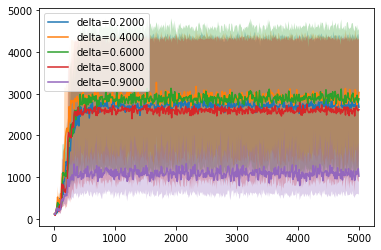

In [47]:
deltas = [0.2, 0.4, 0.6, 0.8, 0.9]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=all*batchsize=10_*cap=10_*delta=%.4f*' % delta) for delta in deltas}
candidates_NORM = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}
f = nu.compare(candidates_NORM, bootstrap=True)

### Compare Normalization

multi (delta = 0.05): 4652.836762 ± 124.225815	[4498.590041, 4807.083484]	 total horizon: 232693
multi (normalize all, delta = 0.4): 2814.331887 ± 1845.838116	[522.421151, 5106.242622]	 total horizon: 141040


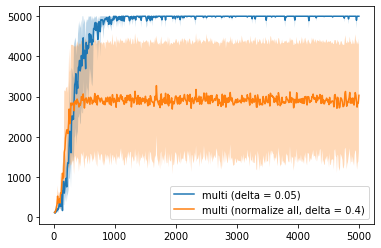

In [48]:
f = nu.compare({ 'multi (delta = 0.05)': candidates_MIS['delta=0.0500'],
                'multi (normalize all, delta = 0.4)': candidates_NORM['delta=0.4000']},
                bootstrap=True)

### MULTIPLE IS, Capacity = 5 (row-normalize)

delta=0.2000: 4287.914670 ± 1141.008878	[2871.165024, 5704.664315]	 total horizon: 214537
delta=0.4000: 1931.276332 ± 1846.541562	[-361.507846, 4224.060510]	 total horizon: 96986
delta=0.6000: 3379.675286 ± 2101.073028	[770.848551, 5988.502022]	 total horizon: 169203
delta=0.8000: 1841.387834 ± 1749.504457	[-330.908864, 4013.684532]	 total horizon: 92489
delta=0.9000: 2705.123033 ± 2072.053365	[132.328968, 5277.917099]	 total horizon: 135574


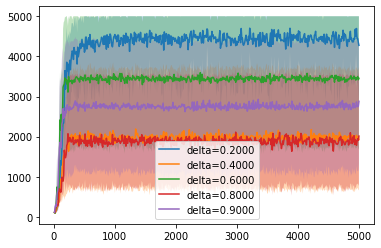

In [49]:
deltas = [0.2, 0.4, 0.6, 0.8, 0.9]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=all*batchsize=10_*cap=5_*delta=%.4f*' % delta) for delta in deltas}
candidates_MIS5= {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}
f = nu.compare(candidates_MIS5, bootstrap=True)

### MULTIPLE Capacity=10 vs Capacity=5

multi (capacity=10, delta = 0.2): 4582.480595 ± 369.589338	[4318.092310, 4846.868881]	 total horizon: 229247
multi (capacity=5, delta = 0.2): 4287.914670 ± 1141.008878	[2871.165024, 5704.664315]	 total horizon: 214537


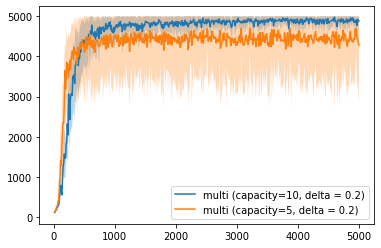

In [50]:
f = nu.compare({'multi (capacity=10, delta = 0.2)': candidates_MIS['delta=0.2000'],
                'multi (capacity=5, delta = 0.2)': candidates_MIS5['delta=0.2000']},
                bootstrap=True)

### SINGLE vs MULTI

single (delta = 0.1): 4783.427942 ± 68.553306	[4698.307770, 4868.548114]	 total horizon: 239215
multi (capacity=10, delta = 0.05): 4652.836762 ± 124.225815	[4498.590041, 4807.083484]	 total horizon: 232693


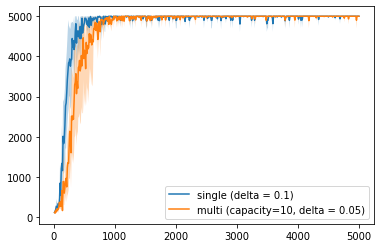

In [51]:
f = nu.compare({'single (delta = 0.1)' : candidates_IS['delta=0.1000'], 
                'multi (capacity=10, delta = 0.05)': candidates_MIS['delta=0.0500']},
              bootstrap=True)

******************************************

## Batchsize = 5

delta=0.0100: 3953.081868 ± 47.481413	[3894.125907, 4012.037829]	 total horizon: 197789
delta=0.0200: 4300.101048 ± 107.198054	[4166.997084, 4433.205011]	 total horizon: 215097
delta=0.0500: 4432.917633 ± 95.560412	[4314.263709, 4551.571556]	 total horizon: 221735
delta=0.1000: 3214.895928 ± 1394.301701	[1483.641703, 4946.150153]	 total horizon: 161070
delta=0.2000: 1947.225779 ± 1780.765422	[-263.886535, 4158.338092]	 total horizon: 97777


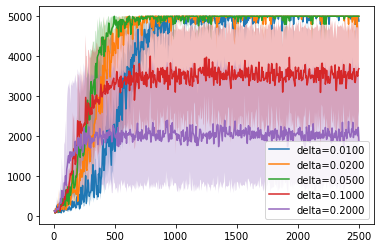

In [52]:
deltas = [0.01, 0.02, 0.05, 0.1, 0.2]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=rows*batchsize=5_*cap=1_*delta=%.4f*' % delta) for delta in deltas}
candidates_IS = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}
f = nu.compare(candidates_IS, bootstrap=True)

### MULTIPLE IS (capacity = 10), row-normalized

delta=0.0100: 3850.560269 ± 272.302971	[3512.451474, 4188.669064]	 total horizon: 192688
delta=0.0200: 3759.455561 ± 1131.823167	[2354.111482, 5164.799640]	 total horizon: 188158
delta=0.0500: 3951.149888 ± 774.768235	[2989.148064, 4913.151712]	 total horizon: 197785
delta=0.1000: 3463.912668 ± 1653.075369	[1411.348495, 5516.476840]	 total horizon: 173434
delta=0.2000: 3759.346275 ± 1323.043915	[2116.570278, 5402.122272]	 total horizon: 188208


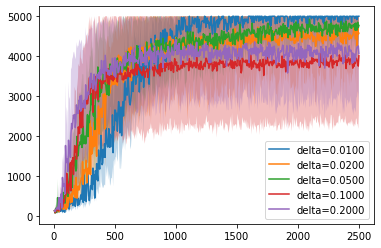

In [53]:
deltas = [0.01, 0.02, 0.05, 0.1, 0.2]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=rows*batchsize=5_*cap=10_*delta=%.4f*' % delta) for delta in deltas}
candidates_MIS = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}
f = nu.compare(candidates_MIS, bootstrap=True)

single (delta = 0.05): 4432.917633 ± 95.560412	[4314.263709, 4551.571556]	 total horizon: 221735
multi (capacity=10, delta = 0.05): 3951.149888 ± 774.768235	[2989.148064, 4913.151712]	 total horizon: 197785


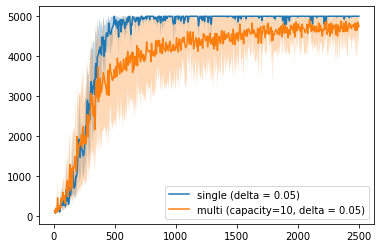

In [54]:
f = nu.compare({'single (delta = 0.05)' : candidates_IS['delta=0.0500'], 
                'multi (capacity=10, delta = 0.05)': candidates_MIS['delta=0.0500']},
               bootstrap=True)

## Batchsize = 2

delta=0.0050: 1333.171313 ± 481.990553	[734.700996, 1931.641631]	 total horizon: 67099
delta=0.0100: 1933.511893 ± 590.013799	[1200.913001, 2666.110786]	 total horizon: 97067
delta=0.0200: 2567.423334 ± 920.059573	[1425.018486, 3709.828181]	 total horizon: 128690
delta=0.0500: 2768.533775 ± 1283.974287	[1174.269128, 4362.798423]	 total horizon: 138739
delta=0.1000: 1784.567030 ± 1028.445300	[507.583527, 3061.550533]	 total horizon: 89694
delta=0.2000: 736.345146 ± 329.158629	[327.640727, 1145.049566]	 total horizon: 37327
delta=0.3000: 1778.843949 ± 1303.342001	[160.531109, 3397.156789]	 total horizon: 89387
delta=0.4000: 1252.733100 ± 1821.209912	[-1008.597681, 3514.063881]	 total horizon: 63057


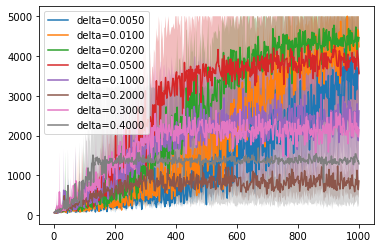

In [55]:
deltas = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=rows*batchsize=2_*cap=1_*delta=%.4f*' % delta) for delta in deltas}
candidates_IS = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}
f = nu.compare(candidates_IS, bootstrap=True)

### MULTIPLE IS (capacity = 10), row-normalized

delta=0.0050: 2150.944623 ± 1301.974972	[534.329174, 3767.560072]	 total horizon: 107892
delta=0.0100: 2643.385522 ± 996.823984	[1405.665068, 3881.105975]	 total horizon: 132471
delta=0.0200: 3144.989803 ± 399.713422	[2648.680037, 3641.299568]	 total horizon: 157504
delta=0.0500: 1901.980624 ± 881.454520	[807.510280, 2996.450967]	 total horizon: 95572
delta=0.1000: 3039.871572 ± 1241.601083	[1498.220206, 4581.522937]	 total horizon: 152312
delta=0.2000: 1588.436935 ± 1580.284205	[-373.745069, 3550.618939]	 total horizon: 79851
delta=0.3000: 3519.476605 ± 1464.357915	[1701.236101, 5337.717110]	 total horizon: 176180
delta=0.4000: 1966.518085 ± 1976.483579	[-487.610418, 4420.646588]	 total horizon: 98723


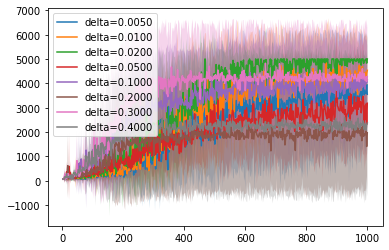

In [56]:
deltas = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=rows*batchsize=2_*cap=10_*delta=%.4f*' % delta) for delta in deltas}
candidates_MIS = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}
f = nu.compare(candidates_MIS)

### MULTIPLE IS (capacity = 50), row-normalized

delta=0.0050: 1058.245335 ± 302.345923	[682.833287, 1433.657383]	 total horizon: 53370
delta=0.0100: 1799.972560 ± 646.901482	[996.738278, 2603.206841]	 total horizon: 90387
delta=0.0200: 2136.385896 ± 650.266828	[1328.972987, 2943.798805]	 total horizon: 107173
delta=0.0500: 2061.000674 ± 940.913616	[892.702112, 3229.299237]	 total horizon: 103423
delta=0.1000: 2693.249971 ± 897.915592	[1578.340507, 3808.159436]	 total horizon: 134985
delta=0.2000: 2454.354568 ± 1101.039877	[1087.232992, 3821.476143]	 total horizon: 123073
delta=0.3000: 3488.686236 ± 712.223899	[2604.343462, 4373.029011]	 total horizon: 174663
delta=0.4000: 2550.595185 ± 1559.394364	[614.351345, 4486.839026]	 total horizon: 127854


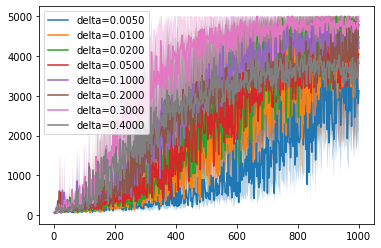

In [58]:
deltas = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=rows*batchsize=2_*cap=50_*delta=%.4f*' % delta) for delta in deltas}
candidates_MIS50 = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}
f = nu.compare(candidates_MIS50, bootstrap=True)

### Single vs Multi

single (delta = 0.05): 2768.533775 ± 1283.974287	[1174.269128, 4362.798423]	 total horizon: 138739
multi (capacity=50), delta=0.3: 3488.686236 ± 712.223899	[2604.343462, 4373.029011]	 total horizon: 174663


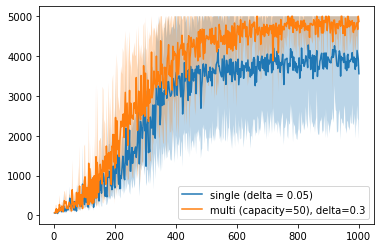

In [59]:
f = nu.compare({'single (delta = 0.05)' : candidates_IS['delta=0.0500'], 
                #'multi (capacity=10, delta = 0.3)': candidates_MIS['delta=0.3000'],
                'multi (capacity=50), delta=0.3': candidates_MIS50['delta=0.3000']},
              bootstrap=True)

****

## Mountain Car

### Single IS (capacity = 1), self-normalized

delta=0.0100: -82.862255 ± 3.413260	[-87.100377, -78.624133]	 total horizon: 57475
delta=0.0200: -82.179049 ± 2.635012	[-85.450849, -78.907250]	 total horizon: 57069
delta=0.0500: -79.577575 ± 2.938775	[-83.226547, -75.928604]	 total horizon: 55468
delta=0.1000: -82.784199 ± 2.610749	[-86.025873, -79.542526]	 total horizon: 57462


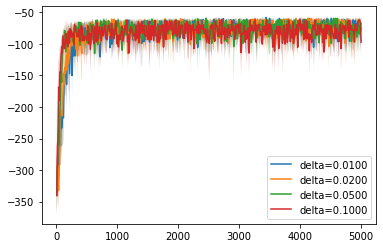

In [60]:
deltas = [0.01, 0.02, 0.05, 0.1]
files = {delta : glob.glob(path + '*env=RLLAB.MOUNTAIN-CAR*norm=rows*batchsize=10_*cap=1_*delta=%.4f*' % delta) for delta in deltas}
candidates_IS = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}
f = nu.compare(candidates_IS, bootstrap=True)

### MULTIPLE IS (capacity = 10), row-normalized

delta=0.0100: -90.639464 ± 1.793071	[-92.865856, -88.413072]	 total horizon: 62129
delta=0.0200: -90.918489 ± 3.869549	[-95.723168, -86.113809]	 total horizon: 62344
delta=0.0500: -89.323909 ± 6.906037	[-97.898887, -80.748930]	 total horizon: 61455
delta=0.1000: -94.224122 ± 12.856602	[-110.187701, -78.260542]	 total horizon: 64607


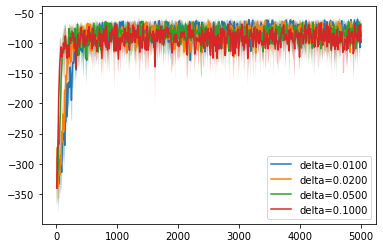

In [61]:
deltas = [0.01, 0.02, 0.05, 0.1]
files = {delta : glob.glob(path + '*env=RLLAB.MOUNTAIN-CAR*norm=rows*batchsize=10_*cap=10_*delta=%.4f*' % delta) for delta in deltas}
candidates_MIS = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}
f = nu.compare(candidates_MIS, bootstrap=True)

### Single vs Multi

single (delta = 0.05): -79.577575 ± 2.938775	[-83.226547, -75.928604]	 total horizon: 55468
multi (capacity=10, delta = 0.05): -89.323909 ± 6.906037	[-97.898887, -80.748930]	 total horizon: 61455


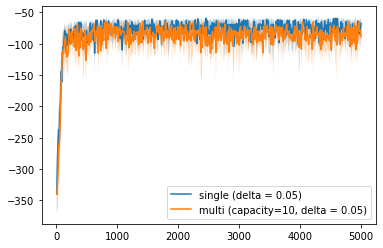

In [62]:
f = nu.compare({'single (delta = 0.05)' : candidates_IS['delta=0.0500'], 
                'multi (capacity=10, delta = 0.05)': candidates_MIS['delta=0.0500']},
              bootstrap=True)

****

## Inverted Pendulum

### Single IS (capacity = 1), self-normalized

delta=0.0100: -109.185920 ± 0.104424	[-109.315579, -109.056260]	 total horizon: 9979
delta=0.0200: -108.679142 ± 0.124445	[-108.833661, -108.524623]	 total horizon: 9683
delta=0.0500: -107.999685 ± 0.240905	[-108.298809, -107.700562]	 total horizon: 9998
delta=0.1000: -102.731509 ± 6.816887	[-111.195792, -94.267226]	 total horizon: 18150


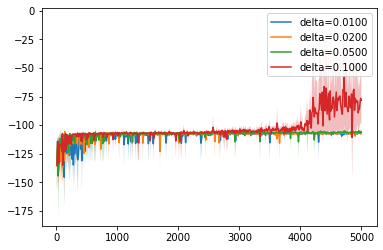

In [63]:
deltas = [0.01, 0.02, 0.05, 0.1]
files = {delta : glob.glob(path + '*env=RLLAB.INVERTED-PENDULUM*norm=rows*batchsize=10_*cap=1_*delta=%.4f*' % delta) for delta in deltas}
candidates_IS = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}
f = nu.compare(candidates_IS, bootstrap=True)

### MULTIPLE IS (capacity = 10), row-normalized

delta=0.0100: -109.071661 ± 0.253181	[-109.386027, -108.757295]	 total horizon: 9346
delta=0.0200: -108.677664 ± 0.205620	[-108.932975, -108.422353]	 total horizon: 9200
delta=0.0500: -108.245623 ± 0.042772	[-108.298731, -108.192514]	 total horizon: 8926
delta=0.1000: -107.772643 ± 0.209131	[-108.032314, -107.512972]	 total horizon: 8623


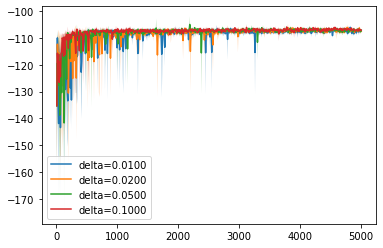

In [64]:
deltas = [0.01, 0.02, 0.05, 0.1]
files = {delta : glob.glob(path + '*env=RLLAB.INVERTED-PENDULUM*norm=rows*batchsize=10_*cap=10_*delta=%.4f*' % delta) for delta in deltas}
candidates_MIS = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}
f = nu.compare(candidates_MIS, bootstrap=True)

### Single vs Multi

single (delta = 0.1): -107.999685 ± 0.240905	[-108.298809, -107.700562]	 total horizon: 9998
multi (capacity=10, delta = 0.1): -108.245623 ± 0.042772	[-108.298731, -108.192514]	 total horizon: 8926


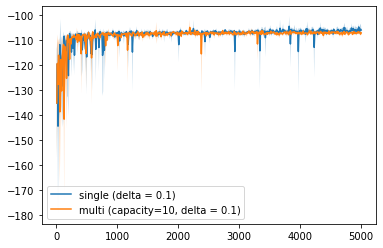

In [65]:
f = nu.compare({'single (delta = 0.1)' : candidates_IS['delta=0.0500'], 
                'multi (capacity=10, delta = 0.1)': candidates_MIS['delta=0.0500']},
              bootstrap=True)

****

## Inverted Double Pendulum

### Single IS (capacity = 1), self-normalized

delta=0.0100: 566.475300 ± 80.067438	[467.058444, 665.892156]	 total horizon: 30609
delta=0.0200: 2321.444549 ± 819.501085	[1303.899555, 3338.989543]	 total horizon: 125286
delta=0.0500: 2299.599132 ± 1421.675944	[534.355295, 4064.842968]	 total horizon: 124086
delta=0.1000: 1488.049885 ± 1432.393679	[-290.501778, 3266.601548]	 total horizon: 80215


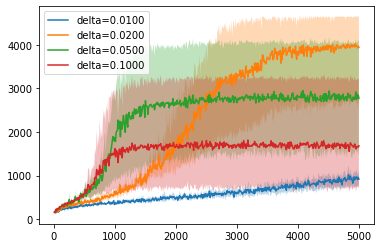

In [66]:
deltas = [0.01, 0.02, 0.05, 0.1]
files = {delta : glob.glob(path + '*env=RLLAB.INVERTED-DOUBLE-PENDULUM*norm=rows*batchsize=10_*cap=1_*delta=%.4f*' % delta) for delta in deltas}
candidates_IS = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}
f = nu.compare(candidates_IS, bootstrap=True)

### MULTIPLE IS (capacity = 10), row-normalized

delta=0.0100: 635.714259 ± 303.373816	[259.025913, 1012.402605]	 total horizon: 34391
delta=0.0200: 2229.855901 ± 818.065650	[1214.093235, 3245.618568]	 total horizon: 120397
delta=0.0500: 1690.317405 ± 1203.081581	[196.494319, 3184.140491]	 total horizon: 91584
delta=0.1000: 1421.589663 ± 1229.764187	[-105.364254, 2948.543580]	 total horizon: 76723


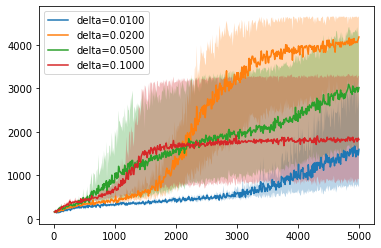

In [67]:
deltas = [0.01, 0.02, 0.05, 0.1]
files = {delta : glob.glob(path + '*env=RLLAB.INVERTED-DOUBLE-PENDULUM*norm=rows*batchsize=10_*cap=10_*delta=%.4f*' % delta) for delta in deltas}
candidates_MIS = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}
f = nu.compare(candidates_MIS, bootstrap=True)

### Single vs Multi

single (delta = 0.02): 2299.599132 ± 1421.675944	[534.355295, 4064.842968]	 total horizon: 124086
multi (capacity=10, delta = 0.02): 1690.317405 ± 1203.081581	[196.494319, 3184.140491]	 total horizon: 91584


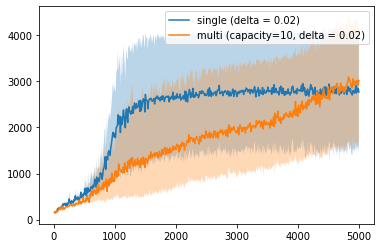

In [68]:
f = nu.compare({'single (delta = 0.02)' : candidates_IS['delta=0.0500'], 
                'multi (capacity=10, delta = 0.02)': candidates_MIS['delta=0.0500']},
              bootstrap=True)